##### Assignment 01: <br>
Load the Iris dataset into a pandas DataFrame<br>
Find the mean and median of the 'sepal_length' column.<br>
1.Calculate the 75th percentile of the 'petal_width' column for each species in the Iris dataset.<br>
2.Create a new column in the Iris DataFrame called 'sepal_area', which is the product of 'sepal_length' and 'sepal_width'.<br>
3.Remove all rows in the Iris DataFrame where 'petal_length' is greater than twice the standard deviation of 'petal_length' for that species.<br>
4.Normalize all numerical columns in the Iris DataFrame (except the 'species' column) using Min-Max scaling.<br>
5.Find the three most common combinations of 'sepal_length', 'sepal_width', and 'petal_length' in the Iris dataset.<br>
6.Group the Iris DataFrame by 'species' and find the row with the highest 'sepal_width' for each group.<br>
7.Replace all negative values in the 'petal_width' column of the Iris DataFrame with the mean of the non-negative values in that column.<br>
8.Calculate the correlation matrix for the 'sepal_length', 'sepal_width', 'petal_length', and 'petal_width' columns in the Iris dataset and find the feature with the highest absolute correlation with 'petal_width'.


In [1]:
import seaborn as sns

In [2]:
df=sns.load_dataset('iris')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
import numpy as np

In [5]:
# mean of the sepal_lenght column
df['sepal_length'].mean()

5.843333333333334

In [6]:
#median of the sepal_length column
np.median(df['sepal_length'])

5.8

In [7]:
# 1.Calculate the 75th percentile of the 'petal_width' column for each species in the Iris dataset.<br>

<Axes: ylabel='petal_width'>

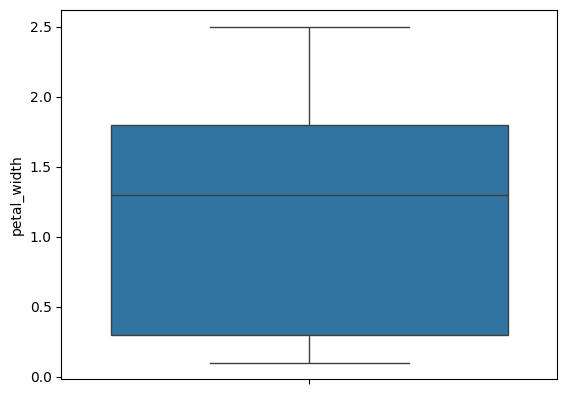

In [8]:
sns.boxplot(df['petal_width'])

In [9]:
df['petal_width'].quantile(0.75)    # this is not our ans

1.8

In [10]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [11]:
ans=df.groupby('species')['petal_width'].quantile(0.75)

In [12]:
ans

species
setosa        0.3
versicolor    1.5
virginica     2.3
Name: petal_width, dtype: float64

In [13]:
df.groupby('species').quantile(0.75)

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.2,3.675,1.575,0.3
versicolor,6.3,3.000,4.600,1.5
virginica,6.9,3.175,5.875,2.3


In [14]:
#2.Create a new column in the Iris DataFrame called 'sepal_area', which is the product of 'sepal_length' and 'sepal_width'.<br>

In [15]:
df['sepal_length'].head(),df['sepal_width'].head()

(0    5.1
 1    4.9
 2    4.7
 3    4.6
 4    5.0
 Name: sepal_length, dtype: float64,
 0    3.5
 1    3.0
 2    3.2
 3    3.1
 4    3.6
 Name: sepal_width, dtype: float64)

In [16]:
mult=df['sepal_length'].head()*df['sepal_width'].head()

In [17]:
mult

0    17.85
1    14.70
2    15.04
3    14.26
4    18.00
dtype: float64

In [18]:
df['sepal_area']=mult

In [19]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area
0,5.1,3.5,1.4,0.2,setosa,17.85
1,4.9,3.0,1.4,0.2,setosa,14.70
2,4.7,3.2,1.3,0.2,setosa,15.04
3,4.6,3.1,1.5,0.2,setosa,14.26
4,5.0,3.6,1.4,0.2,setosa,18.00


3.Remove all rows in the Iris DataFrame where 'petal_length' is greater than twice the standard deviation of 'petal_length' for that species.<br>

In [20]:
std_species=df.groupby('species')['petal_length'].std()

In [21]:
std_species

species
setosa        0.173664
versicolor    0.469911
virginica     0.551895
Name: petal_length, dtype: float64

In [22]:
df.shape

(150, 6)

In [27]:
def remove_outliers_by_species(group):
    return group[abs(group['petal_length']-group['petal_length'].mean())<=2*group['petal_length'].std()]

df=df.groupby('species').apply(remove_outliers_by_species).reset_index(drop=True)


'''
abs(df['petal_length']): This expression computes the absolute values of each element in the 'petal_length' column. 
It effectively removes the sign of the values, converting any negative values to their positive counterparts. 
The result is a Series with only non-negative values.
'''

In [28]:
df.shape

(134, 6)

In [25]:
abs(df['petal_length'])

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
135    5.2
136    5.0
137    5.2
138    5.4
139    5.1
Name: petal_length, Length: 140, dtype: float64

In [26]:
df['petal_length']

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
135    5.2
136    5.0
137    5.2
138    5.4
139    5.1
Name: petal_length, Length: 140, dtype: float64